# Distributed Computing with Dask: Step-by-step Exercise

Mahdi Farnaghi and Mahdi Khodadadzadeh

October 2024


**Objective: Explore distributed computing concepts using Dask for Exploratory Data Analysis (EDA).**

## Dataset

### Description 

In this exercise, we will be using the **Iris dataset**, one of the most well-known datasets in data science. The Iris dataset contains 150 samples from three species of Iris flowers: *Iris setosa*, *Iris virginica*, and *Iris versicolor*. Each sample has four features:

1. **Sepal length** (in cm)
2. **Sepal width** (in cm)
3. **Petal length** (in cm)
4. **Petal width** (in cm)

These features describe the physical characteristics of the flowers, which are used to classify the species. The dataset is widely used for classification tasks and exploratory data analysis (EDA).

---

### Dataset Columns:

- **sepal length**: Length of the sepal (in cm).
- **sepal width**: Width of the sepal (in cm).
- **petal length**: Length of the petal (in cm).
- **petal width**: Width of the petal (in cm).
- **species**: The species of the Iris flower (*Iris setosa*, *Iris virginica*, or *Iris versicolor*).

---

We will use this dataset to explore how Dask can be applied to distributed computing tasks for data analysis.

---

## Installation

In [ ]:
# !pip install "dask[distributed]" --upgrade 
# !pip install dask[dataframe]
# !pip install scipy

## Step 1: Setting up the Dask Client

Task: Initialize a Dask Client to enable parallel and distributed computing.

In [1]:
from dask.distributed import Client
import dask.dataframe as dd

#Configuring Dask Client, setting number of workers, thread and limit memory
client = Client(n_workers=8, threads_per_worker=2, memory_limit="16GB")


In [2]:
import warnings
warnings.filterwarnings('ignore')

## Step 2: Load the dataset using Dask

Task: Load the Iris dataset using `dask.read_csv`.

Instruction: Use Dask's `read_csv` to load the Iris dataset. This is similar to how you use `pandas.read_csv`. Print the first 5 rows of the dataset.

In [3]:
data = dd.read_csv('EDA_iris.txt',header=0)

In [4]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Step 3: Set the Index

Task: Set the species as the index for the dataframe.

Instruction: Change the index of the dataframe to 'species' and check how the dataset looks after the change.

In [5]:
data = data.set_index('species')
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.1,3.5,1.4,0.2
Iris-setosa,4.9,3.0,1.4,0.2
Iris-setosa,4.7,3.2,1.3,0.2
Iris-setosa,4.6,3.1,1.5,0.2
Iris-setosa,5.0,3.6,1.4,0.2


## Step 6: Getting Data Information

Task: Retrieve information about the dataframe's columns and types.

Instruction: Use .info() to explore the dataframe's structure.

In [6]:
data.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 4 entries, sepal_length to petal_width
dtypes: float64(4)

In [7]:
print(data.columns)


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


Task: Compute descriptive statistics for the dataset.

Instruction: Use .describe() to calculate statistics for each column and ensure that you trigger computation with .compute().

In [8]:
data.describe().compute()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Step 4: Slicing the Dataset

Task: Perform slicing on the dataframe to select specific rows.

Instruction: Select a few rows from the dataframe and compute them using Dask's parallel computation.

In [9]:
#using the random split function of dask dataframe, we convert it into 3 to 97 split and take the first split entity which contains a few rows
#Random state is to keep the results reproducable
a,b=data.random_split([0.03,0.97],random_state = 123)
a.compute()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.4,3.7,1.5,0.2
Iris-setosa,4.8,3.4,1.6,0.2
Iris-setosa,4.8,3.1,1.6,0.2
Iris-setosa,5.1,3.8,1.9,0.4
Iris-setosa,4.8,3.0,1.4,0.3
Iris-setosa,5.1,3.8,1.6,0.2
Iris-versicolor,5.0,2.3,3.3,1.0
Iris-virginica,6.4,3.1,5.5,1.8


## Step 5: Mean, Quantiles, and Variance

Task: Compute the mean, quantiles, and variance of the dataset.

Instruction: Calculate the mean, quantiles, and variance of the dataset.

In [10]:
#Mean, variance and quantiles are builtin functions of pandas

mean=data.mean().compute()
variance=data.var().compute()
quantile=data.quantile([0.25,0.5,0.75]).compute()


In [11]:
print(mean)

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64


In [12]:
print(variance)

sepal_length    0.685694
sepal_width     0.188004
petal_length    3.113179
petal_width     0.582414
dtype: float64


In [13]:
print(quantile)

      sepal_length  sepal_width  petal_length  petal_width
0.25           5.1          2.8          1.60          0.3
0.50           5.8          3.0          4.35          1.3
0.75           6.4          3.3          5.10          1.8


## Step 6: Data Visualization

Task: Visualize the distribution of columns using histograms and density plots.

Instruction: Plot the histogram and kernel density estimate (KDE) for the 'sepal length' column.

In [14]:
pip install hvplot


In [20]:
#Selecting Sepal Length Column
import hvplot.dask
sepal_length = data['sepal_length']


In [26]:
#Histogram plot
sepal_length.hvplot.hist(bins=10)

:Histogram   [sepal_length]   (sepal_length_count)

In [27]:
#Kernel Density estimation plot
sepal_length.hvplot.kde()

:Distribution   [sepal_length]   (Density)

## Step 7: Pie and Bar Charts

Task: Create a pie chart and bar chart based on species count.

Instruction: Visualize the species distribution using a pie chart and a bar chart.

In [33]:
#Group wise count, group by index i.e. Specie
species_grouped=data.groupby(data.index).size().compute()

Text(0, 0.5, ' ')

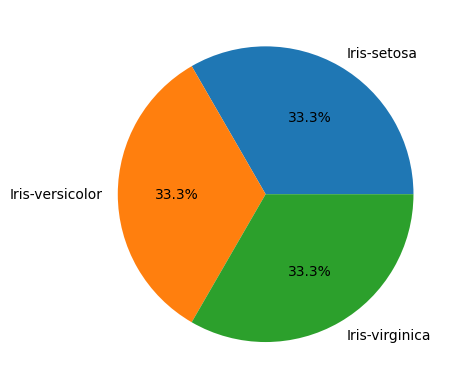

In [34]:
species_grouped.plot(kind='pie', autopct='%1.1f%%').set_ylabel(' ')

<AxesSubplot: xlabel='species'>

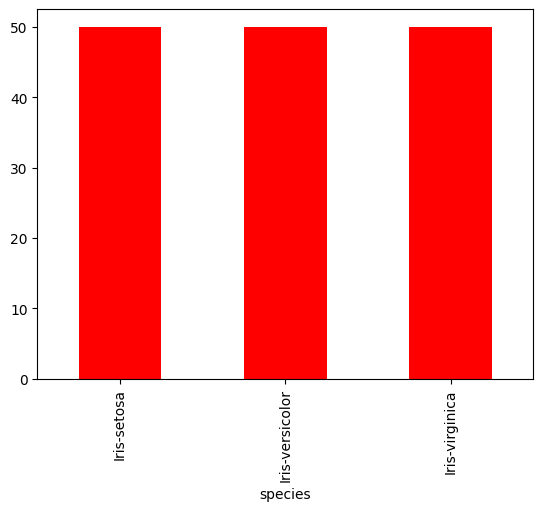

In [35]:
#Bar plot of grouped species
species_grouped.plot(kind='bar',color='Red')

## Step 8: Covariance and Correlation

Task: Compute the covariance and correlation of the dataset.

Instruction: Calculate and display the covariance and correlation between columns.

In [36]:
#Calculating covariance matrix
data_cov = data.cov().compute()
data_cov

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.039268,1.273682,0.516904
sepal_width,-0.039268,0.188004,-0.321713,-0.117981
petal_length,1.273682,-0.321713,3.113179,1.296387
petal_width,0.516904,-0.117981,1.296387,0.582414


In [37]:
#Calculating correlation matrix
data_correlation = data.corr().compute()
data_correlation

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


## Step 8: Boxplot and Scatterplot

Task: Create a boxplot and scatterplot of the dataset.

Instruction: Generate a boxplot and scatterplot to explore the data distribution.

In [38]:
#Box and whisker plot
data.hvplot.box()

:BoxWhisker   [Variable]   (value)

In [39]:
from pandas.plotting import scatter_matrix


## Step 9: Advanced Plots (3D and Hexbin)

Task: Create advanced visualizations such as a 3D plot and hexbin plot.

Instruction: Create a 3D scatter plot and a hexbin plot to visualize the relationship between petal length and width.

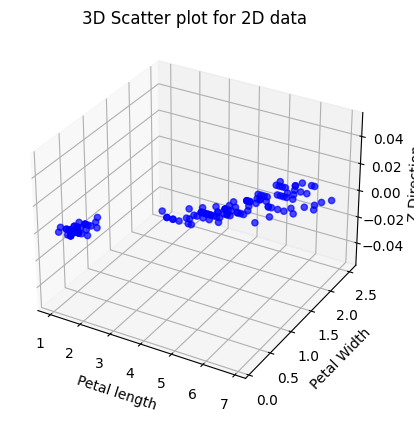

In [41]:
#3D scatter plot

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a 2D scatter plot in 3D space (z will be constant)
ax.scatter(data['petal_length'], data['petal_width'], zs=0, zdir='z', s=20, c='blue', alpha=0.7)

# Labels and title
ax.set_xlabel('Petal length')
ax.set_ylabel('Petal Width')
ax.set_zlabel('Z Direction')
ax.set_title('3D Scatter plot for 2D data')

# Show the plot
plt.show()

In [42]:
#Hexagon Bin
data.hvplot.hexbin(x='petal_length',y = 'petal_width', width=600, height=500, logz=True,cmap='inferno')

:HexTiles   [petal_length,petal_width]

## Final Step: Closing the Dask Client

Task: Properly close the Dask Client when done.

Instruction: Always remember to close the Dask Client when you're finished with the tasks.

In [ ]:
client.shutdown()  